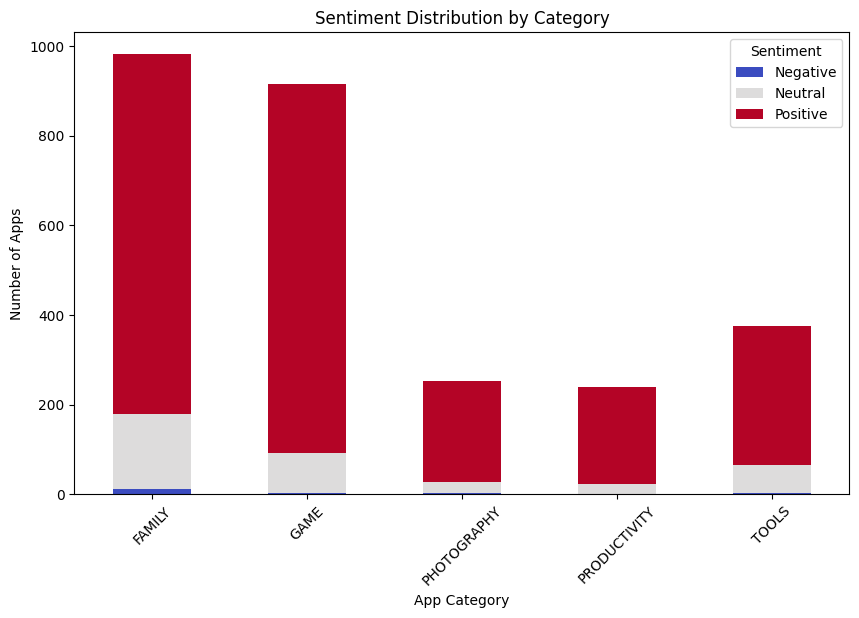

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("googleplaystore.csv")

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Filter apps with more than 1,000 reviews
df = df[df['Reviews'] > 1000]

# Define sentiment based on rating
df['Sentiment'] = np.where(df['Rating'] >= 4.0, 'Positive',
                           np.where(df['Rating'] >= 3.0, 'Neutral', 'Negative'))

# Identify top 5 categories
top_categories = df['Category'].value_counts().nlargest(5).index
df = df[df['Category'].isin(top_categories)]

# Group by category and sentiment
sentiment_distribution = df.groupby(['Category', 'Sentiment']).size().unstack()

# Plot stacked bar chart
sentiment_distribution.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("Sentiment Distribution by Category")
plt.xlabel("App Category")
plt.ylabel("Number of Apps")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()
